Nap Cola Ori 1l / ,A
HerbGrCitoLitptoż5tb — F
EelHaerummisK*lB@g I 1
KrakeTopMix300g_ * V
P Karni Ci 0,4l ń



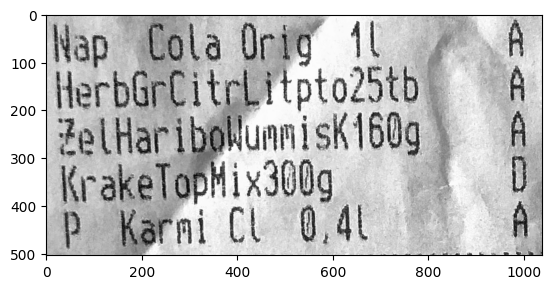

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

def enhance_txt(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inv_gray = 255 - gray

    # Apply unsharp masking to the inverted grayscale image
    blurred = cv2.GaussianBlur(inv_gray, (5, 5), 0)
    unsharp_mask = cv2.addWeighted(inv_gray, 1.5, blurred, -0.5, 0)
    enhanced_inv = cv2.normalize(unsharp_mask, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply the CLAHE algorithm to the inverted grayscale image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_inv_clahe = clahe.apply(enhanced_inv)

    # Invert the enhanced grayscale image
    enhanced = 255 - enhanced_inv_clahe

    return enhanced

# Load the image
image = cv2.imread('C:/Users/tompys/Documents/Projekt/paragon.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to the grayscale image
#thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (the receipt) and extract it
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
receipt = image[y:y+h, x:x+w]
'''
# Tilt the receipt to make it straight
edges = cv2.Canny(receipt, 100, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
angle = 0
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle += np.arctan2(y2 - y1, x2 - x1)
angle /= len(lines)
rows, cols, _ = receipt.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle*180/np.pi, 1)
receipt = cv2.warpAffine(receipt, M, (cols, rows))
'''
# Enhance the text in the receipt
enhanced_receipt = enhance_txt(receipt)

# Use OCR to read the text from the image
text = pytesseract.image_to_string(enhanced_receipt, config="--oem 3 --psm 6 -l pol")

# Display the result using Matplotlib
print(text)
plt.imshow(cv2.cvtColor(enhanced_receipt, cv2.COLOR_BGR2RGB))
plt.show()

: MEDIAEXPERT
_.R.: S.A AL. PIASTA 6 77-400 ŻE
ÓW TEL.801-080-114 22-12-79-1
wuu.mediaexpert .pl
„Ni1P 767-10-04-718
2015-11-10 W 210
PARAGON FISKALNY
ODKURZFCZ ELECTROLUX ZCS?220BEL CLASSICA
1,000 x 549 ,99 549 ,996
rabat
WORKI ELECTROLUX EZOIMSK > 4 ZAPACHY — X
1,000 x 59,58 59,99H
Sprzedaz opodatk. f 549 ,5
Kuota PTU A 23 % 10? 84
Suma PLN 5A1,99
000171 śKasa )  Kasjer Ar 168 20 G?
FWWSZAHSBBS[IBZBMQBEIBNCF?M ?FUGBA1E
ZE BBY 10306012 ss
tir transakcji S00Ł/151110312501
Gotouka 500 00
Resz'a SŁ N
NUMER. 5951 EMOWY 3125
OY oZ oT Y y [O =CY RZE



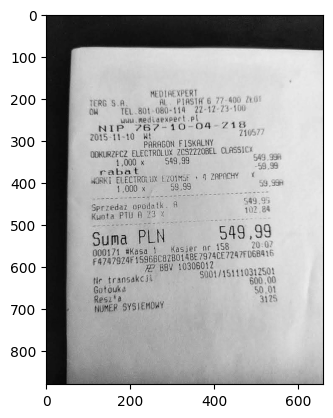

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

def enhance_txt(img):
    # Invert the grayscale image
    inv_gray = 255 - gray

    # Apply unsharp masking to the inverted grayscale image
    blurred = cv2.GaussianBlur(inv_gray, (5, 5), 0)
    unsharp_mask = cv2.addWeighted(inv_gray, 1.5, blurred, -0.5, 0)
    enhanced_inv = cv2.normalize(unsharp_mask, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply the CLAHE algorithm to the inverted grayscale image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_inv_clahe = clahe.apply(enhanced_inv)

    # Invert the enhanced grayscale image
    enhanced = 255 - enhanced_inv_clahe

    return enhanced

# Load the image
image = cv2.imread('C:/Users/tompys/Documents/Projekt/27.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance the text in the image
enhanced_gray = enhance_txt(gray)

# Apply adaptive thresholding to the enhanced grayscale image
thresh = cv2.adaptiveThreshold(enhanced_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (the receipt) and extract it
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
receipt = image[y:y+h, x:x+w]

# Tilt the receipt to make it straight
edges = cv2.Canny(receipt, 100, 200)
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)
angles = []
for line in lines:
    for rho, theta in line:
        if np.pi/4 < theta < 3*np.pi/4:  # Filter vertical lines
            angles.append(theta)

avg_angle = np.mean(angles)
rows, cols, _ = receipt.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), np.rad2deg(avg_angle)-90, 1)
receipt = cv2.warpAffine(receipt, M, (cols, rows))

# Enhance the text in the receipt
enhanced_receipt = enhance_txt(receipt)

# Use OCR to read the text from the image
text = pytesseract.image_to_string(enhanced_receipt, config="--oem 3 --psm 6 -l pol")

# Display the result using Matplotlib
print(text)
plt.imshow(cv2.cvtColor(enhanced_receipt, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
import re
lines = text.split("\n")

# Filter out empty lines and remove special characters from the lines (excluding specific characters)
filtered_lines = [re.sub(r"[^\w\s.,*-]", "", line) for line in lines if line.strip()]

# Join the filtered lines back into a single string
cleaned_text = "\n".join(filtered_lines)

print(cleaned_text)

1914 O 6 - l SG
 1
ChX-cutPapryka140g D 1  x 5,19 5,19D
Rabat. -1,73
3,46D
ChipCrunŻe140g D 1  x5,195,19D
Rabat -1,73
3,46D
ChipCrunŻe140g Di x 5,19 5,19D
Rabat. -1,73
3,46D
LASA BOLO 450G D 1  x7,997,99D
PłatkiCiniMini250g D 1 x 5,70 5,70D
Mleko UHT 3,2 11 D 1  x3,293,29D
KabExPaTarcz95 g D 1  x5,99 5,99D
Rabat. -1,50
4,49D
KobExPaTarcz95 g D 1  x5,99 5,99D
Rabat -1,50
4,49D
BułkaGrahamka 709  D 2 x 0,62 1,24D
Donat Ekipa 73 g D 1  x2,892,89D


In [34]:
import re

def extract_products_from_receipt(receipt):
    lines = str(receipt).split("\n")  # Split the receipt into lines
    products = []
    prev_line = None
    prev_prev_line = None

    # Define the regex pattern for matching the desired lines
    pattern = r"(Szt|\bx[\d.]+|\*[.0-9]+|\d+(?:[,.\s]\d+)?(?:\s+\d+(?:[,.\s]\d+)?)+)"

    # Iterate through each line of the receipt
    for line in lines:
        if re.search(pattern, line, re.IGNORECASE):
            if len(line) < 30 and prev_line is not None:
                 products.append(prev_line + " " + line)
            else:
                 products.append(line)
        prev_line = line

    return products


In [35]:
products = extract_products_from_receipt(cleaned_text)
print(products)

['ChX-cutPapryka140g D 1  x 5,19 5,19D', 'ChipCrunŻe140g D 1  x5,195,19D', 'ChipCrunŻe140g Di x 5,19 5,19D', 'LASA BOLO 450G D 1  x7,997,99D', 'PłatkiCiniMini250g D 1 x 5,70 5,70D', 'Mleko UHT 3,2 11 D 1  x3,293,29D', 'KabExPaTarcz95 g D 1  x5,99 5,99D', 'KobExPaTarcz95 g D 1  x5,99 5,99D', 'BułkaGrahamka 709  D 2 x 0,62 1,24D', 'Donat Ekipa 73 g D 1  x2,892,89D']


In [25]:
file_path = 'product_linse.txt'

with open(file_path, 'a', encoding='utf-8') as file:
    for line in product_lines:
        file.write(line + '\n')
print("Product lines saved to file successfully.")

NameError: name 'product_lines' is not defined

In [9]:
labels = []

for item in product_lines:
    classification = int(input(f"Enter a number for '{item}': "))
    labels.append([classification])
print(labels)

[[1], [2], [5], [7], [2], [3], [4], [5], [7], [9]]
